In [44]:
import pandas as pd
import numpy as np
import gzip
import json
import plotly.io as pio
import plotly.express as px
import nltk
import spacy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pio.renderers.default='notebook'

In [3]:
meta_df_1000 = pd.read_parquet('meta_df_1000_cleaned.parquet')
reviews_df = pd.read_parquet('reviews_df_clean.parquet')

In [4]:
merged_df = pd.merge(meta_df_1000, reviews_df, on='asin', how='inner')
merged_df['category_1'] = merged_df.category.apply(lambda x: x[1])
merged_df['rating'] = merged_df['rating'].astype(float)

In [5]:
merged_df.head()

category  \
0  [Electronics, eBook Readers & Accessories, Rea...   
1  [Electronics, eBook Readers & Accessories, Rea...   
2  [Electronics, eBook Readers & Accessories, Rea...   
3  [Electronics, eBook Readers & Accessories, Rea...   
4  [Electronics, Accessories & Supplies, Audio & ...   

                                         description  \
0                                                 \n   
1                                                 \n   
2                                                 \n   
3                                                 \n   
4  Slim Port Adapter for LG G3 Smartphone! MyDP /...   

                                             title_x also_buy     brand  \
0  Thinking Gifts Folding Booklight, Blue, 1 unit...       []             
1  Thinking Gifts Folding Booklight, Blue, 1 unit...       []             
2  Thinking Gifts Folding Booklight, Blue, 1 unit...       []             
3  Thinking Gifts Folding Booklight, Blue, 1 unit...       []             
4  SlimPort sli44532 Adapter for LG G3 Smartphone...       []  SlimPort   

                                             feature  \
0                                                      
1                                                      
2                                                      
3                                                      
4  This SlimPort/MyDp adapter is specifically des...   

                                                rank  \
0                              [[Books , 3,563,332]]   
1                              [[Books , 3,563,332]]   
2                              [[Books , 3,563,332]]   
3                              [[Books , 3,563,332]]   
4  [[Electronics > Accessories & Supplies > Audio...   

                                           also_view   main_cat date_x  ...  \
0                                                 []      Books         ...   
1                                                 []      Books         ...   
2                                                 []      Books         ...   
3                                                 []      Books         ...   
4  [B00HFYLR4M, B015DJ4QYI, 9791688974, B00B2HORK...  Computers         ...   

                          title_y  \
0                        One Star   
1          Great Bible book light   
2  I also love this reading light   
3             Great Reading Light   
4                     Ease of use   

                                             content     date_y  \
0  didn't work... If I could've given it zero sta... 2018-06-28   
1  Gave as a gift to my brother who teaches Sunda... 2017-03-07   
2  I also love this reading light.  I've had mine... 2014-08-08   
3  I am buying the second one of these. I used th... 2011-10-24   
4                                        Worked well 2022-10-22   

               author rating found_helpful       variant  verified_purchase  \
0              Margie    1.0             0          None               True   
1         Dolphin6411    5.0             0          None               True   
2               Nancy    5.0             1          None              False   
3            James G.    5.0             7          None              False   
4  Malcolm W. Collins    4.0             0  Color: Black               True   

                                             product  \
0  Thinking Gifts Folding Booklight, Blue, 1 unit...   
1  Thinking Gifts Folding Booklight, Blue, 1 unit...   
2  Thinking Gifts Folding Booklight, Blue, 1 unit...   
3  Thinking Gifts Folding Booklight, Blue, 1 unit...   
4  SlimPort sli44532 Adapter for LG G3 Smartphone...   

                    category_1  
0  eBook Readers & Accessories  
1  eBook Readers & Accessories  
2  eBook Readers & Accessories  
3  eBook Readers & Accessories  
4       Accessories & Supplies  

[5 rows x 22 columns]

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5921 entries, 0 to 5920
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           5921 non-null   object        
 1   description        5921 non-null   object        
 2   title_x            5921 non-null   object        
 3   also_buy           5921 non-null   object        
 4   brand              5921 non-null   object        
 5   feature            5921 non-null   object        
 6   rank               5921 non-null   object        
 7   also_view          5921 non-null   object        
 8   main_cat           5921 non-null   object        
 9   date_x             5921 non-null   object        
 10  price              3066 non-null   float64       
 11  asin               5921 non-null   object        
 12  title_y            5921 non-null   object        
 13  content            5921 non-null   object        
 14  date_y  

In [7]:
clus_df1 = merged_df[['brand', 'price', 'found_helpful', 'verified_purchase', 'category_1']].copy()
clus_df1.head()

brand  price  found_helpful  verified_purchase  \
0             9.36              0               True   
1             9.36              0               True   
2             9.36              1              False   
3             9.36              7              False   
4  SlimPort   1.54              0               True   

                    category_1  
0  eBook Readers & Accessories  
1  eBook Readers & Accessories  
2  eBook Readers & Accessories  
3  eBook Readers & Accessories  
4       Accessories & Supplies

In [8]:
clus_df1[clus_df1['brand'] == ""]

brand  price  found_helpful  verified_purchase  \
0            9.36              0               True   
1            9.36              0               True   
2            9.36              1              False   
3            9.36              7              False   
4013          NaN              1               True   
4014          NaN              0               True   
4599        89.00              0               True   

                       category_1  
0     eBook Readers & Accessories  
1     eBook Readers & Accessories  
2     eBook Readers & Accessories  
3     eBook Readers & Accessories  
4013      Computers & Accessories  
4014      Computers & Accessories  
4599      Computers & Accessories

In [10]:
clus_df1['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5921 entries, 0 to 5920
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3066 non-null   float64
dtypes: float64(1)
memory usage: 92.5 KB


In [11]:
clus_df1 = clus_df1[~clus_df1['brand'].str.fullmatch('')]

In [12]:
clus_df1['price'] = clus_df1.groupby(['category_1']).price.transform(lambda x: x.fillna(x.mean()))
clus_df1 = clus_df1.dropna(subset='price')

In [13]:
clus_df1['found_helpful_bins'] = pd.cut(clus_df1.found_helpful, [0,1,2,3,4,6,11,651], include_lowest=True, labels=np.arange(7))

In [14]:
clus_df1['verified_purchase'] = clus_df1['verified_purchase'].astype(int)

In [15]:
clus_df1_dummies = pd.get_dummies(clus_df1, columns=['brand', 'category_1'])

In [16]:
clus_df1.groupby('brand').brand.count()[clus_df1.groupby('brand').brand.count()>15]

brand
2BOOM            16
AC               20
AKG              20
ALZO Digital     19
ANTOP            20
                 ..
mCover           20
miliboo          20
sb components    20
sv3c             20
uxcell           44
Name: brand, Length: 168, dtype: int64

In [25]:
clus_df1_dummies.sample(10)

price  found_helpful  verified_purchase found_helpful_bins  \
2706   7.549339              1                  0                  0   
4231  32.036832              4                  1                  3   
1459  32.036832              0                  1                  0   
4991  19.330511              0                  1                  0   
3597  38.497826              1                  0                  0   
300   19.330511             38                  1                  6   
89    10.060000             15                  1                  6   
355   19.330511              0                  1                  0   
932   12.341596              0                  1                  0   
4023  15.516208              1                  1                  0   

      brand_15.6 inch TaylorHe Skins  brand_2BOOM  brand_3Dstereo Glasses  \
2706                               0            0                       0   
4231                               0            0                       0   
1459                               0            0                       0   
4991                               0            0                       0   
3597                               0            0                       0   
300                                0            0                       0   
89                                 0            0                       0   
355                                0            0                       0   
932                                0            0                       0   
4023                               0            0                       0   

      brand_4AllMemory  brand_A-TECH  brand_AC  ...  \
2706                 0             0         0  ...   
4231                 0             0         0  ...   
1459                 0             0         0  ...   
4991                 0             0         0  ...   
3597                 0             0         0  ...   
300                  0             0         0  ...   
89                   0             0         0  ...   
355                  0             0         0  ...   
932                  0             0         0  ...   
4023                 0             0         0  ...   

      category_1_Computers & Accessories  category_1_Electronics Warranties  \
2706                                   0                                  0   
4231                                   0                                  0   
1459                                   0                                  0   
4991                                   1                                  0   
3597                                   0                                  0   
300                                    1                                  0   
89                                     0                                  0   
355                                    1                                  0   
932                                    0                                  0   
4023                                   0                                  0   

      category_1_GPS, Finders & Accessories  category_1_Headphones  \
2706                                      0                      1   
4231                                      0                      0   
1459                                      0                      0   
4991                                      0                      0   
3597                                      0                      0   
300                                       0                      0   
89                                        0                      0   
355                                       0                      0   
932                                       0                      0   
4023                                      0                      0   

      category_1_Home Audio  category_1_Portable Audio & Video  \
2706                      0                             

In [120]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
kmeans = KMeans(5).fit(clus_df1_dummies)

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [121]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1126,   79, 4533,   27,    9]))

In [122]:
merged_df.rating.value_counts()

5.0    2990
4.0    1345
1.0     620
3.0     580
2.0     386
Name: rating, dtype: int64

In [123]:
trans_points = TSNE(n_components=2).fit_transform(clus_df1_dummies)
trans_points

array([[ -12.132388 ,   82.73332  ],
       [ -24.891605 ,   43.049595 ],
       [ -11.977892 ,   80.5934   ],
       ...,
       [  41.08773  ,   11.076883 ],
       [  39.297462 ,   -0.3995317],
       [ -22.022923 , -107.29064  ]], dtype=float32)

In [124]:
fig = px.scatter(x=trans_points[:, 0], y=trans_points[:, 1], color=kmeans.labels_, symbol=merged_df.loc[clus_df1.index, 'rating'])

fig.update_layout(
    title_text='KMeans Clustering for k-5; shapes indicate rating'
)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [125]:
fig.write_html('plot_kmeans_1.html',
                full_html=False,
                include_plotlyjs='cdn')

In [33]:
merged_df['content'].head(10)

0    didn't work... If I could've given it zero sta...
1    Gave as a gift to my brother who teaches Sunda...
2    I also love this reading light.  I've had mine...
3    I am buying the second one of these. I used th...
4                                          Worked well
5    I had given this item a 1 star and bad review ...
6    I have an LG G3 and love the quality of watchi...
7    Worked perfectly. One side goes into the LG G3...
8    not sure if this adapter is slowing down my ch...
9    The item is a great idea.  I had the same expe...
Name: content, dtype: object

In [34]:
nlp = spacy.load('en_core_web_sm')
merged_df['tokens'] = merged_df['content'].apply(lambda x: nlp(x.lower())) 
merged_df.tokens

0       (did, n't, work, ..., if, i, could, 've, given...
1       (gave, as, a, gift, to, my, brother, who, teac...
2       (i, also, love, this, reading, light, .,  , i,...
3       (i, am, buying, the, second, one, of, these, ....
4                                          (worked, well)
                              ...                        
5916    (i, love, this, monitor, !, i, went, through, ...
5917    (i, bought, this, turd, for, my, 2016, macbook...
5918    (i, installed, these, in, my, jeep, ., super, ...
5919    (great, sound, ., my, son, had, them, installe...
5920       (came, as, described, .,  , no, complaints, .)
Name: tokens, Length: 5921, dtype: object

In [35]:
merged_df['tokens'] = merged_df.tokens.apply(lambda x: [w.lemma_ for w in x if not w.is_stop and not w.is_punct and w.lemma_!=' '])

In [36]:
merged_df['tokens'] = merged_df['tokens'].apply(lambda x: ' '.join(x))
merged_df['tokens'].head(10)

0                                  work give zero star
1    give gift brother teach sunday school need ext...
2    love reading light 3 year end give daughter us...
3    buy second 1 half year travel lot carry backpa...
4                                                 work
5    give item 1 star bad review not give instructi...
6    lg g3 love quality watch video love transfer l...
7    work perfectly go lg g3 t mobile connect hdmi ...
8    sure adapter slow charger tablet battery drain...
9    item great idea experience device flash work w...
Name: tokens, dtype: object

In [111]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
tokens_vectorized = vectorizer.fit_transform(merged_df['tokens'])
tokens_vectorized

<5921x14169 sparse matrix of type '<class 'numpy.int64'>'
	with 186627 stored elements in Compressed Sparse Row format>

In [112]:
tokens_vectorized.shape

(5921, 14169)

In [113]:
kmeans_1 = KMeans(5).fit(tokens_vectorized)

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [114]:
trans_points = TSNE(n_components=2, init="random").fit_transform(tokens_vectorized)
trans_points

array([[ -4.0325627, -11.6298685],
       [  1.088072 ,  11.351503 ],
       [ 27.399868 ,  18.602459 ],
       ...,
       [ 26.09285  ,  -2.7078183],
       [-16.351328 ,  10.361432 ],
       [  6.3170323,  -8.411816 ]], dtype=float32)

In [115]:
fig = px.scatter(x=trans_points[:, 0], y=trans_points[:, 1], color=np.array(kmeans_1.labels_, dtype='str'), symbol=merged_df.loc[:, 'rating']).update_traces(mode="markers")
symbols = ["circle","diamond","square", "cross", "plus"]
symbol_map = {t:s for t, s in zip(np.sort(merged_df['rating'].unique()), symbols)}

fig.update_layout(
    title_text='KMeans Clustering for k-5; shapes indicate rating'
)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [53]:
# fig.write_html('plot_kmeans_1_cnt_vct.html',
#                 full_html=False,
#                 include_plotlyjs='cdn')

In [54]:
symbols = ["circle","diamond","square", "cross", "plus"]
symbol_map = {t:s for t, s in zip(np.sort(merged_df['rating'].unique()), symbols)}
symbol_map

{1.0: 'circle', 2.0: 'diamond', 3.0: 'square', 4.0: 'cross', 5.0: 'plus'}

In [116]:
region_lst = []
for trace in fig["data"]:
    trace["name"] = trace["name"].split(",")[1]
    
    if trace["name"] not in region_lst and trace["marker"]['color'] == '#636efa':
        trace["showlegend"] = True
        region_lst.append(trace["name"])
    else:
        trace["showlegend"] = False
fig.update_layout(legend_title = "rating")  
fig.show()


In [117]:
fig.write_html('plot_kmeans_1_cnt_vct.html',
                full_html=False,
                include_plotlyjs='cdn')

In [59]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    # Use LaTeX default serif font.
    "font.serif": [],
    # Use specific cursive fonts.
    "font.cursive": ["Comic Neue", "Comic Sans MS"],
})

silhouette_score_ 0.9695291435161749


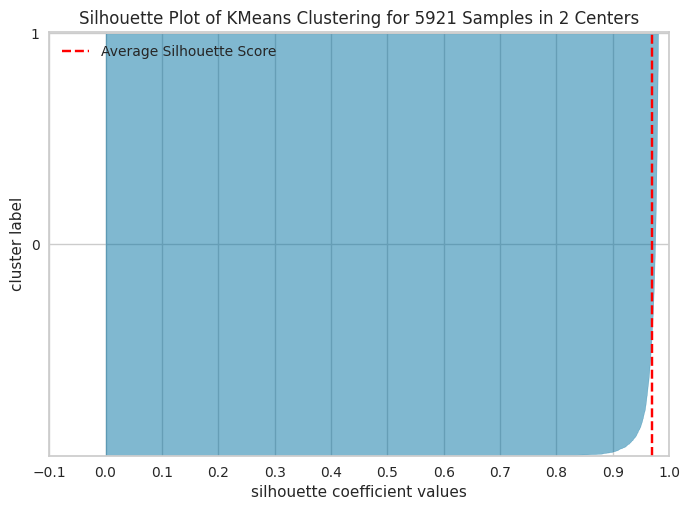

silhouette_score_ 0.6620274847562333


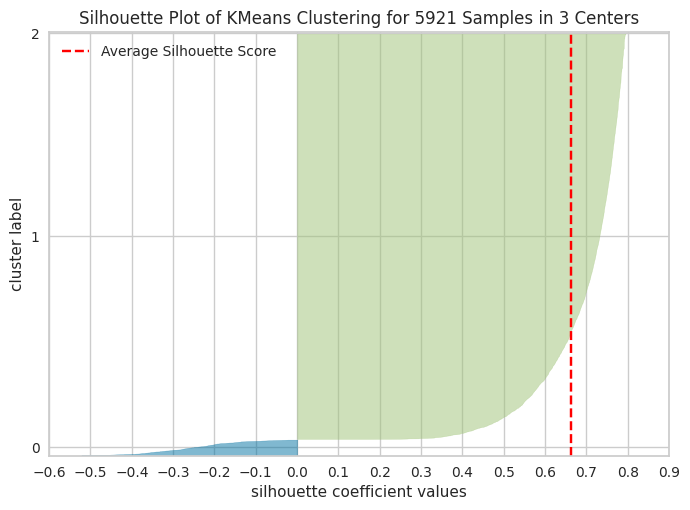

silhouette_score_ 0.6209643838708202


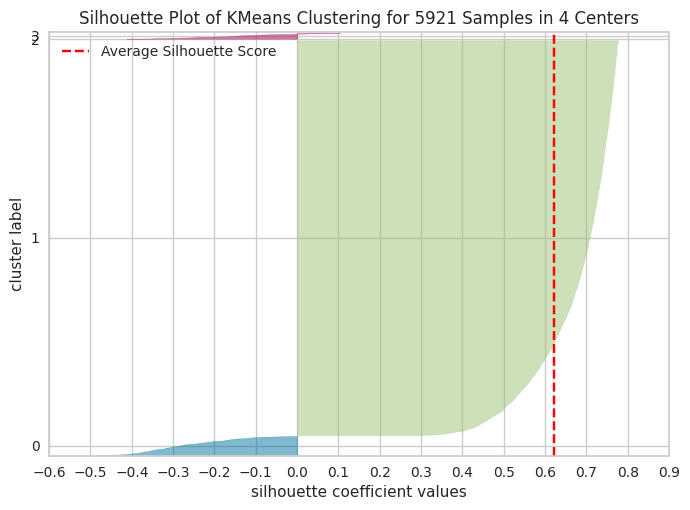

silhouette_score_ 0.5666611235180034


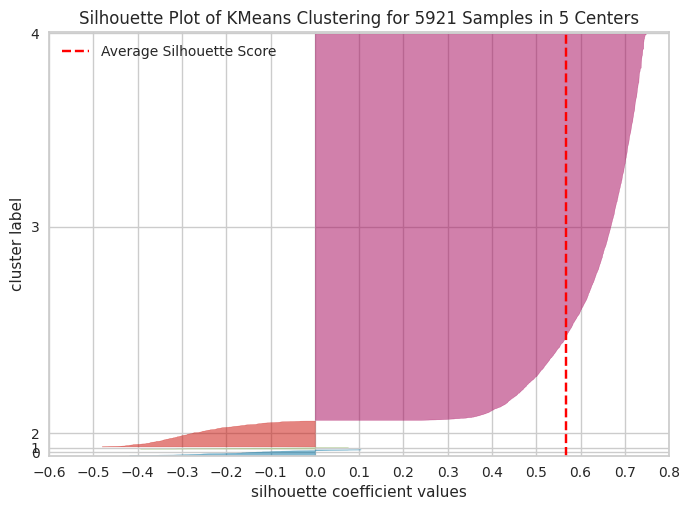

silhouette_score_ 0.5139180883989688


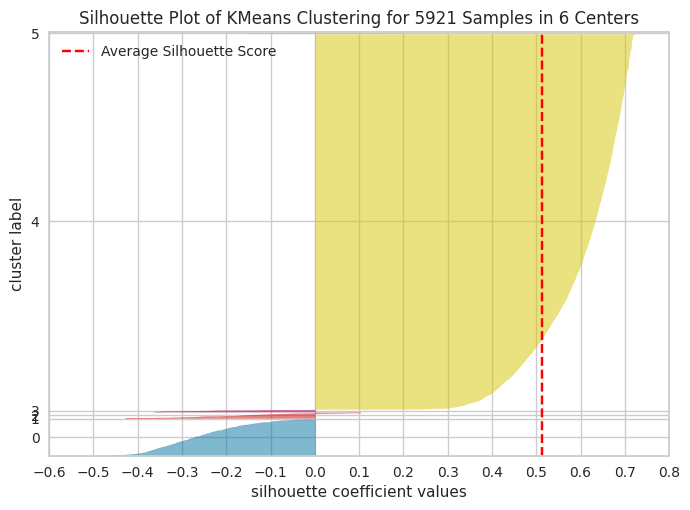

silhouette_score_ 0.46309945061522323


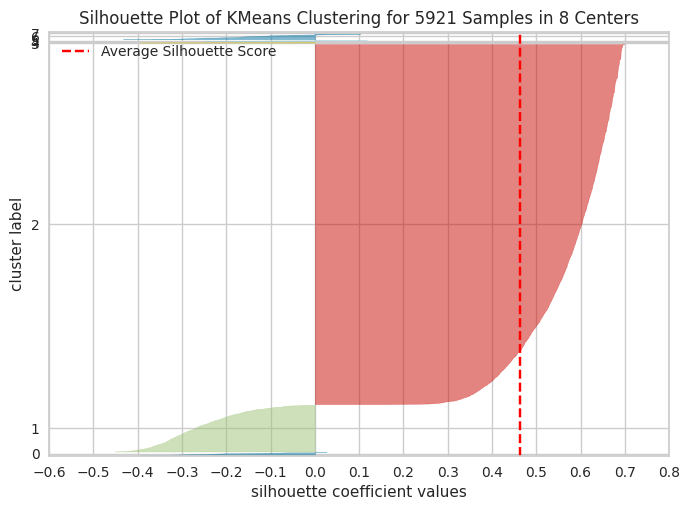

silhouette_score_ 0.3230411379925507


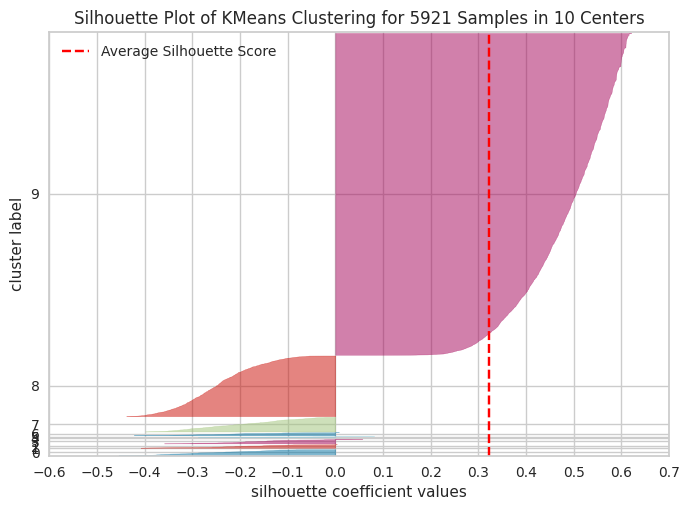

In [60]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, 
                    max_iter=300, tol=0.0001, verbose=0, 
                    random_state=None, copy_x=True, algorithm='lloyd')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

    visualizer.fit(tokens_vectorized)        # Fit the data to the visualizer
    print ('silhouette_score_', visualizer.silhouette_score_)
    visualizer.show()        # Finalize and render the figure

In [111]:
from sklearn.decomposition import PCA, TruncatedSVD
svd = TruncatedSVD(n_components=10)

X_pca = svd.fit_transform(tokens_vectorized)


In [112]:
svd.explained_variance_ratio_

array([0.19509445, 0.05906608, 0.02885905, 0.01557462, 0.01359159,
       0.01247954, 0.01172939, 0.00991026, 0.00909402, 0.00800985])

silhouette_score_ 0.9897241844458353


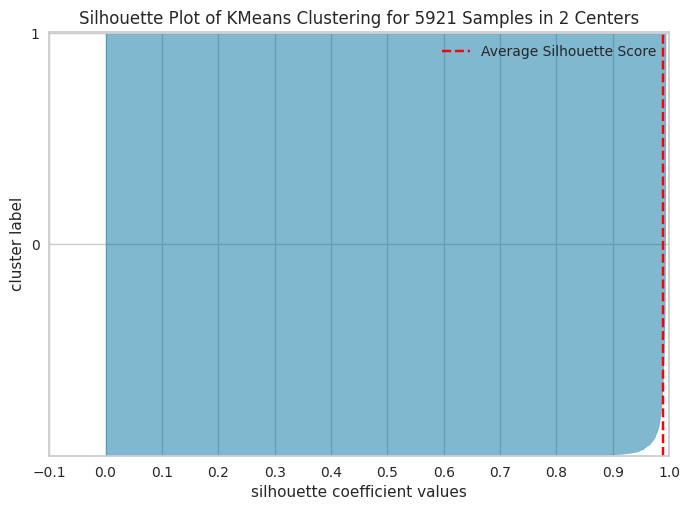

silhouette_score_ 0.809285131423718


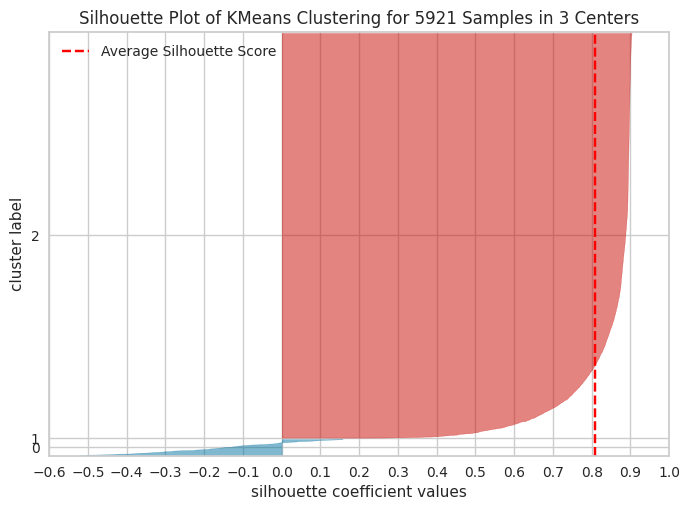

silhouette_score_ 0.7730220727406855


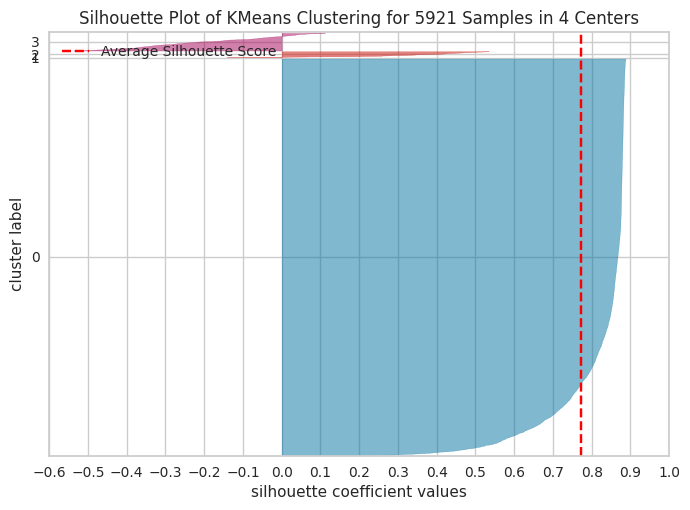

silhouette_score_ 0.6756592141499722


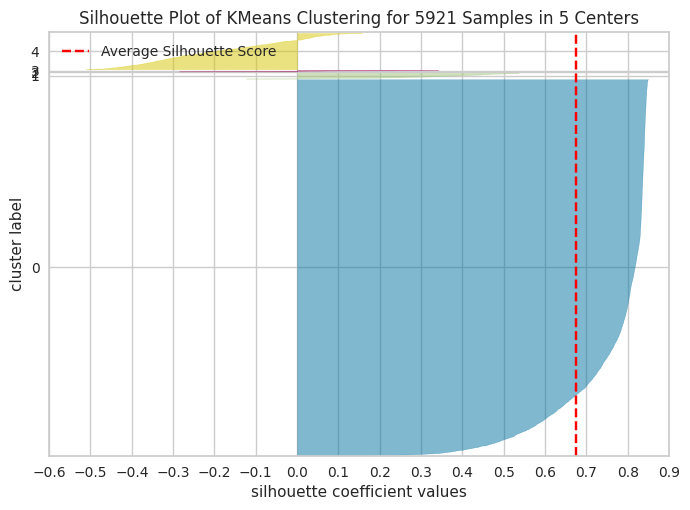

silhouette_score_ 0.5471718212523479


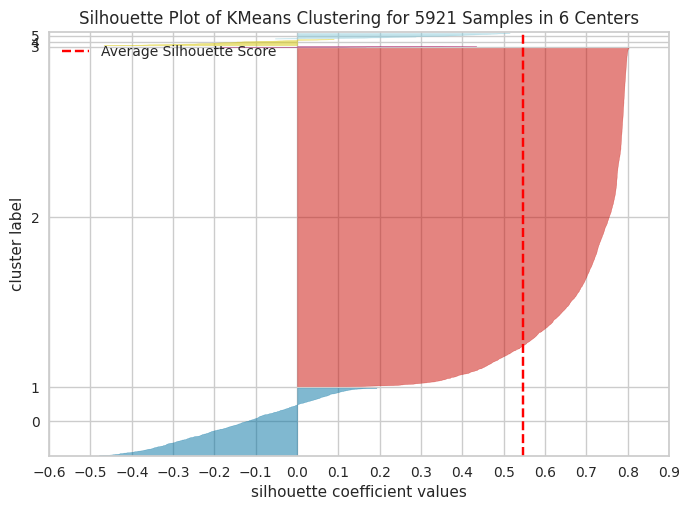

silhouette_score_ 0.5123169629121802


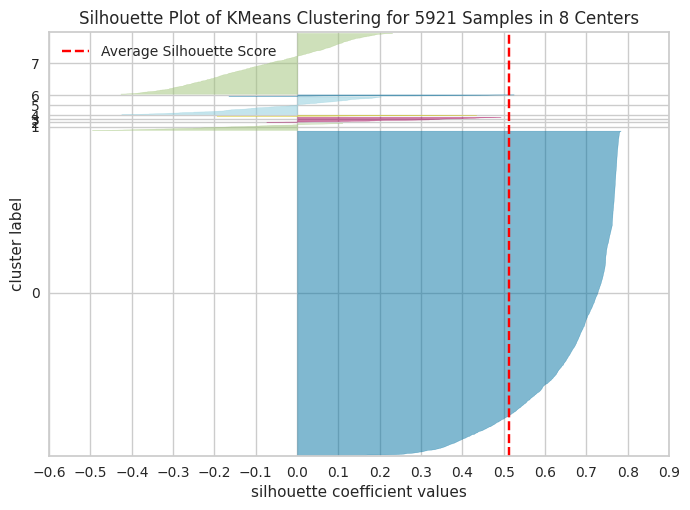

silhouette_score_ 0.5097183589630508


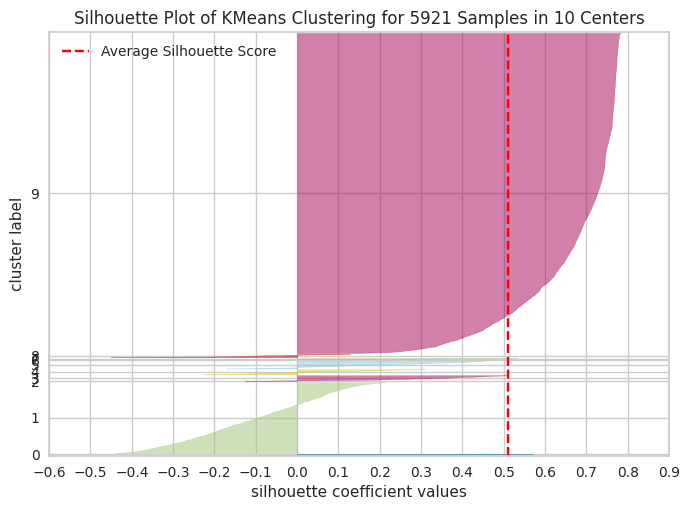

In [114]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, 
                    max_iter=300, tol=0.0001, verbose=0, 
                    random_state=None, copy_x=True, algorithm='lloyd')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

    visualizer.fit(X_pca)        # Fit the data to the visualizer
    print ('silhouette_score_', visualizer.silhouette_score_)
    visualizer.show()        # Finalize and render the figure

In [63]:
# import seaborn as sns
# pl = sns.scatterplot(x=trans_points[:, 0], y=trans_points[:, 1], hue=np.array(cluster_ind, dtype='str'), style=merged_df.loc[:, 'rating'])
# ax2 = pl.axes


In [64]:
vectorizer = TfidfVectorizer()
tokens_vectorized = vectorizer.fit_transform(merged_df['tokens'])
tokens_vectorized.shape

(5921, 14169)

In [65]:
[n for n in vectorizer.vocabulary_ if vectorizer.vocabulary_[n] == 10]
vectorizer.get_feature_names_out().shape

(14169,)

In [187]:
tokens_vectorized_df = pd.DataFrame.sparse.from_spmatrix(tokens_vectorized, columns=vectorizer.get_feature_names_out())
tokens_vectorized_df.to_csv('tokens_vectorized.csv')

/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_4790/1243109821.py:2: FutureWarning:

The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`



In [66]:
tokens_vectorized_df.isna().sum()[tokens_vectorized_df.isna().sum()!=0]

NameError: name 'tokens_vectorized_df' is not defined

In [67]:
trans_points = TSNE(n_components=2, init="random").fit_transform(tokens_vectorized)
trans_points

array([[ -2.1031067 ,  -5.554947  ],
       [-27.263481  ,   7.0026817 ],
       [ -6.987746  , -16.903654  ],
       ...,
       [ 18.50987   , -20.56708   ],
       [-22.66366   ,   0.76646477],
       [-14.237432  ,  10.012275  ]], dtype=float32)

In [195]:
pd.DataFrame(trans_points, columns=['x', 'y']).to_csv('trans_points.csv')

silhouette_score_ 0.002699788564425848


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.0024325810395177025


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.002844606595240736


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.004596996844523844


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.004902227281703689


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.005632250180201626


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.005365764772591195


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.004912252885761972


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



silhouette_score_ 0.007328866278122472


/var/folders/mr/j7cgrptd10344f4v1yr36nv00000gn/T/ipykernel_25807/204323990.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



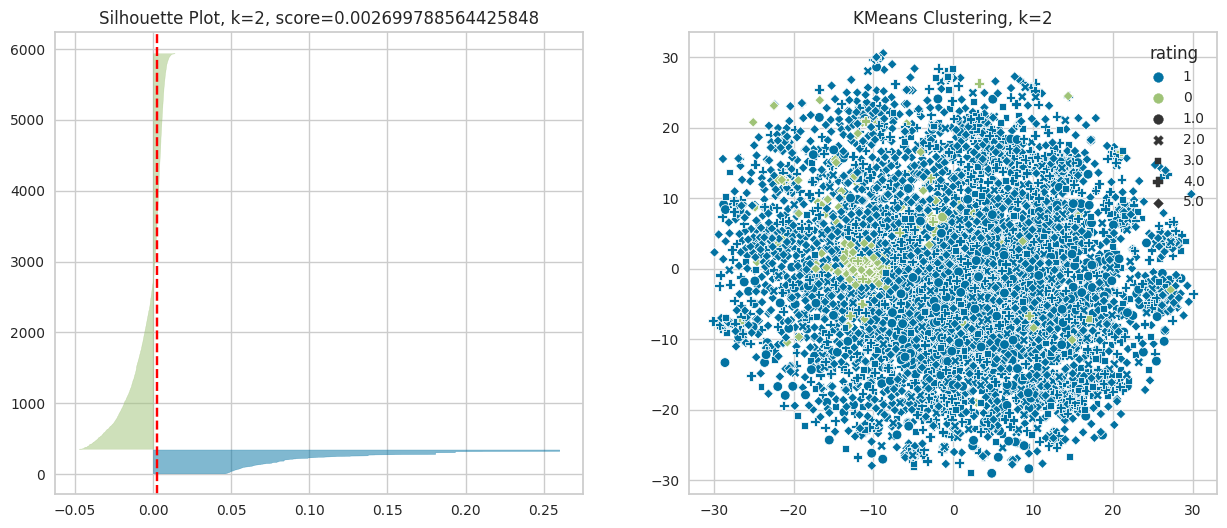

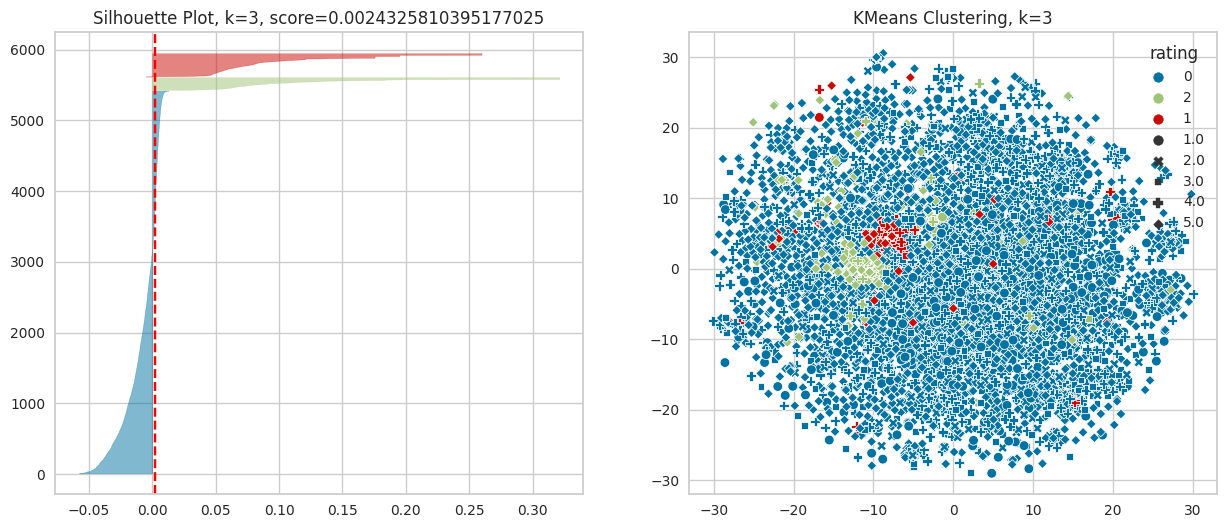

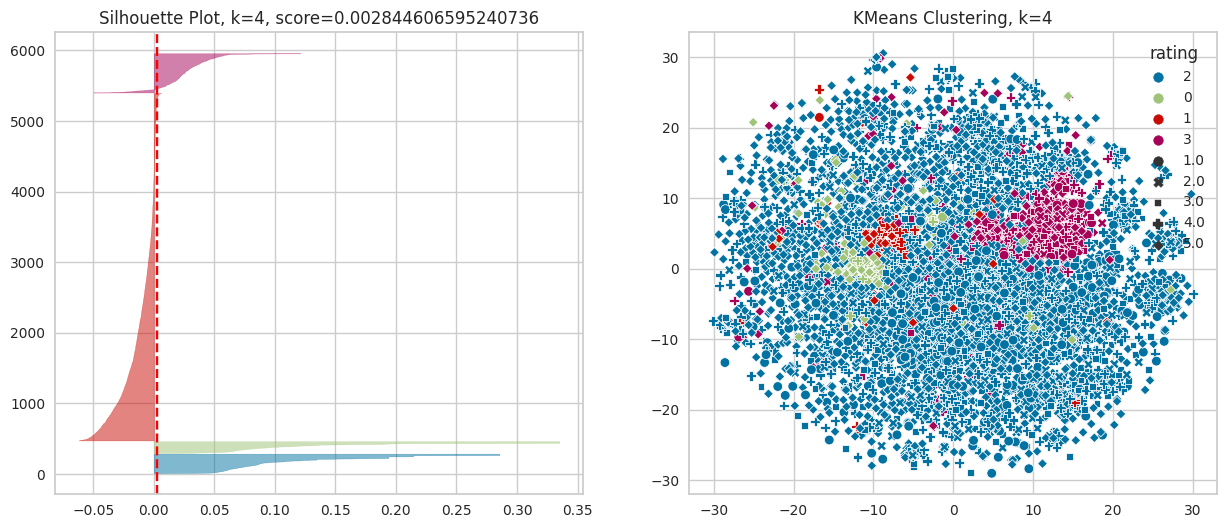

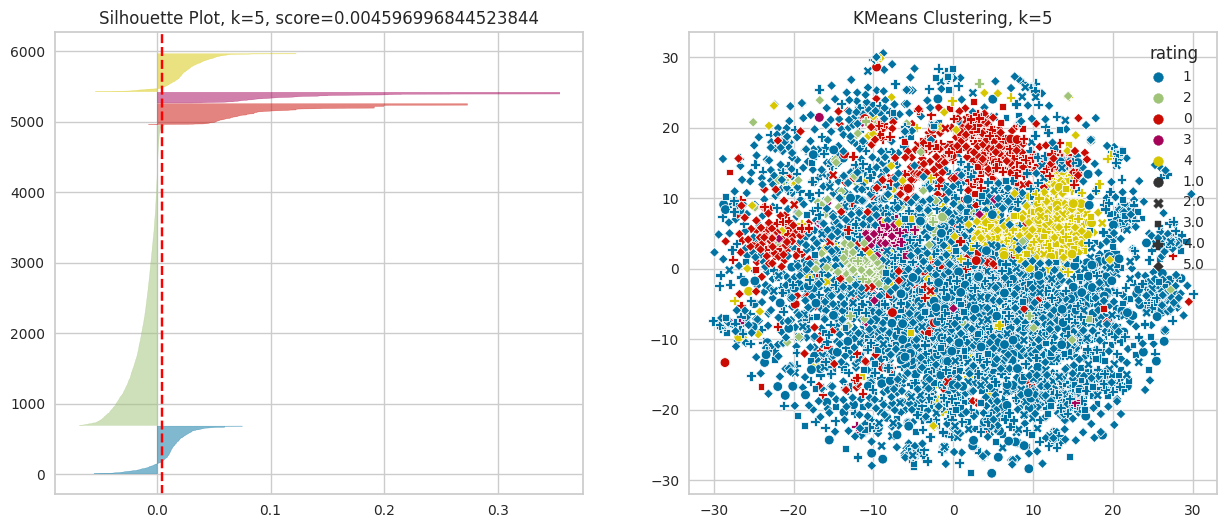

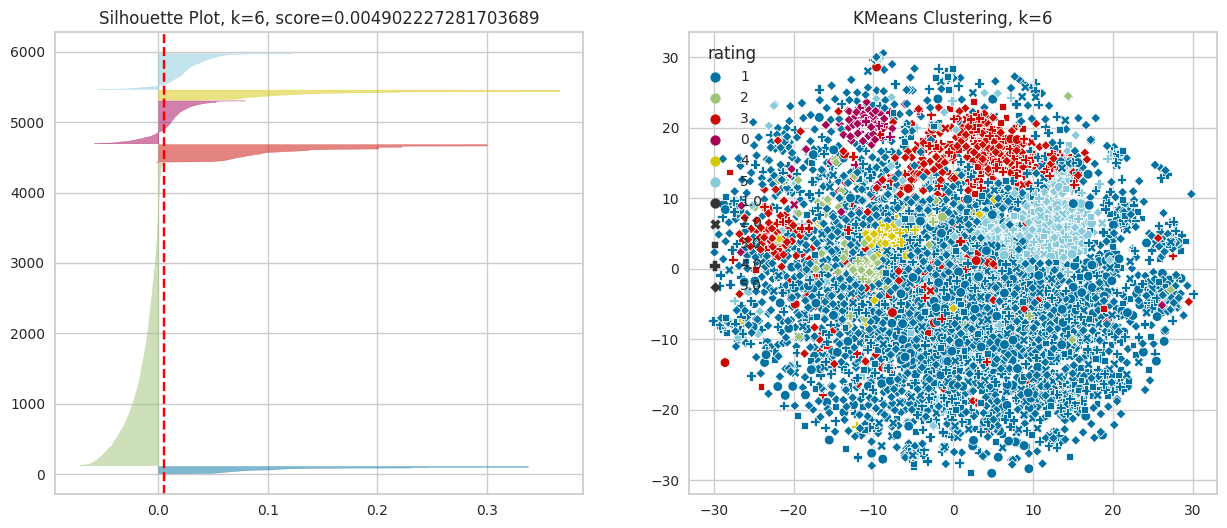

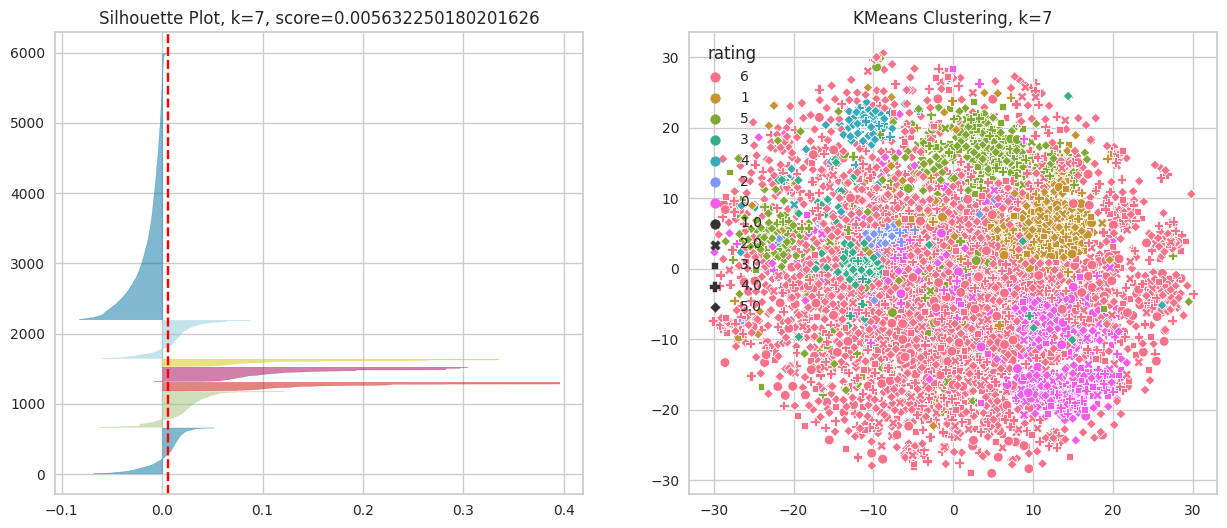

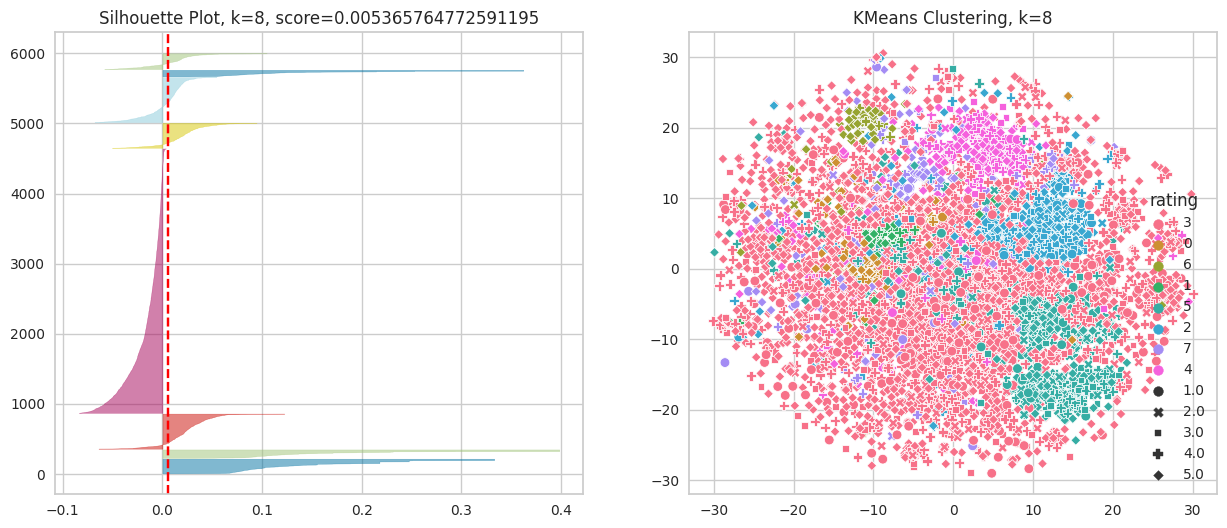

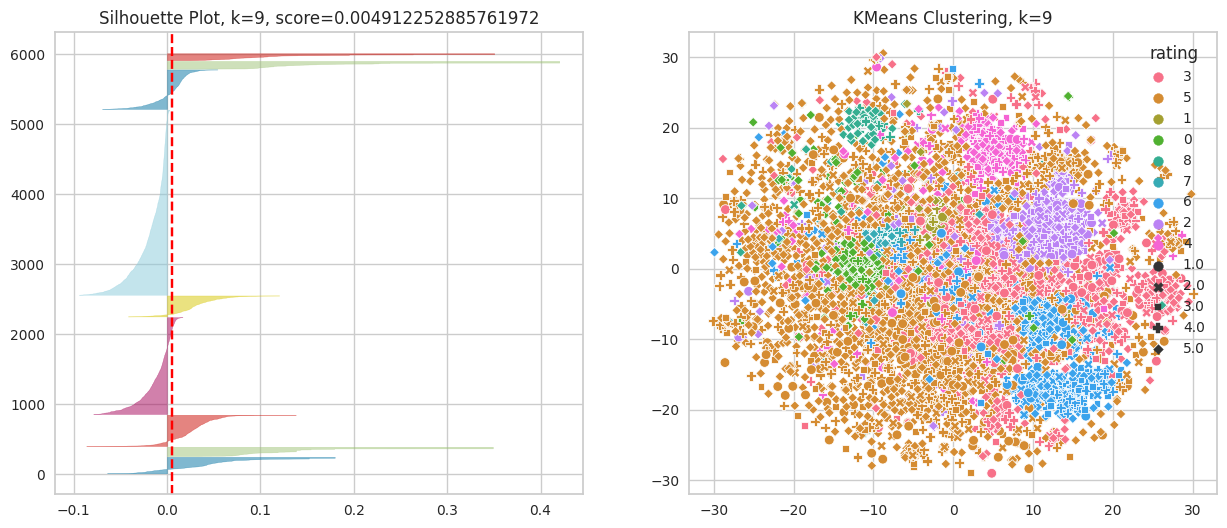

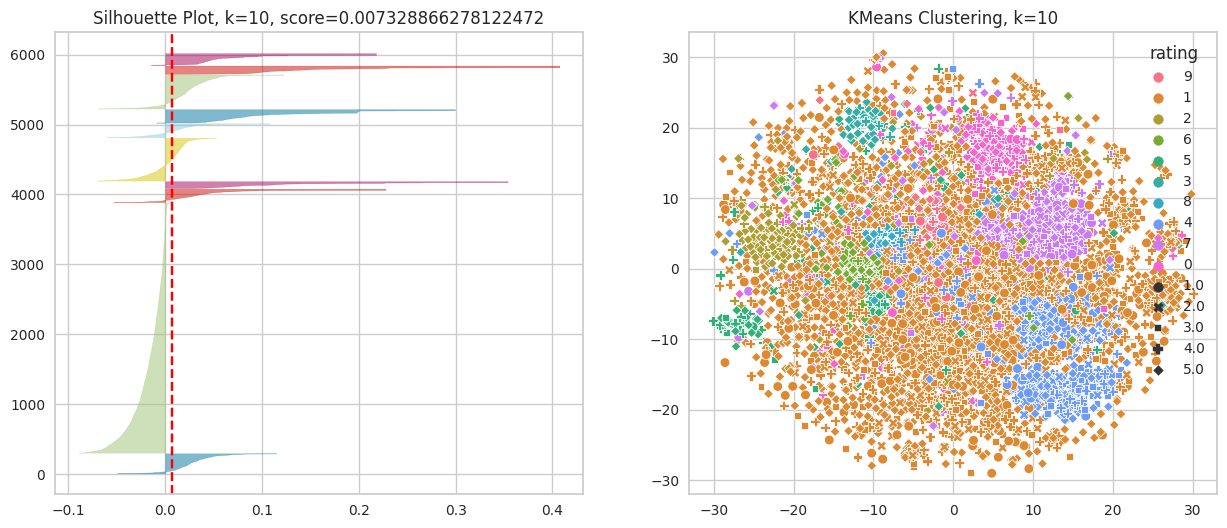

In [87]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, 
                    max_iter=300, tol=0.0001, verbose=0, 
                    random_state=None, copy_x=True, algorithm='lloyd')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax1)

    visualizer.fit(tokens_vectorized)        # Fit the data to the visualizer
    print ('silhouette_score_', visualizer.silhouette_score_)
    pl = sns.scatterplot(x=trans_points[:, 0], y=trans_points[:, 1], hue=np.array(visualizer.estimator.labels_, dtype='str'), style=merged_df.loc[:, 'rating'])
    ax2 = pl.axes
    ax1.title.set_text('Silhouette Plot, k={}, score={}'.format(n, visualizer.silhouette_score_))
    ax2.title.set_text('KMeans Clustering, k={}'.format(n))
    fig.show()        # Finalize and render the figure
    

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/anupbhutada/miniforge3/lib/python3.10/site-pa

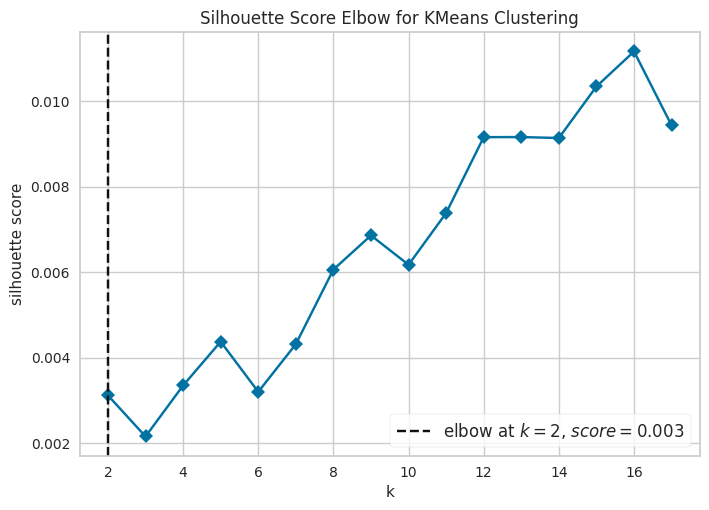

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [96]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, metric='silhouette', k=(2,18), timings=False)

visualizer.fit(tokens_vectorized)
visualizer.show()

In [97]:
kmeans_1 = KMeans(n_clusters=16, init='k-means++', n_init=10, 
                max_iter=300, tol=0.0001, verbose=0, 
                random_state=None, copy_x=True, algorithm='lloyd')

cluster_ind = kmeans.fit_predict(tokens_vectorized)

/Users/anupbhutada/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [118]:
trans_points = TSNE(n_components=2, init="random").fit_transform(tokens_vectorized)
trans_points

array([[ -0.02875351,  -6.907543  ],
       [-21.284391  ,   7.4099174 ],
       [ -5.822917  , -10.521445  ],
       ...,
       [  6.2000613 ,   1.3215375 ],
       [-18.233997  ,   9.38458   ],
       [-15.968433  , -10.283004  ]], dtype=float32)

In [101]:
fig = px.scatter(x=trans_points[:, 0], y=trans_points[:, 1], color=np.array(cluster_ind, dtype='str'), symbol=merged_df.loc[:, 'category_1']).update_traces(mode="markers")
# symbols = ["circle","diamond","square", "cross", "plus"]
# symbol_map = {t:s for t, s in zip(np.sort(merged_df['rating'].unique()), symbols)}
fig.update_layout(
    title_text='KMeans Clustering for k-16; shapes indicate categories'
)
region_lst = []
for trace in fig["data"]:
    trace["name"] = trace["name"].split(",")[1]
    
    if trace["name"] not in region_lst and trace["marker"]['color'] == '#636efa':
        trace["showlegend"] = True
        region_lst.append(trace["name"])
    else:
        trace["showlegend"] = False
fig.update_layout(legend_title = "rating")  
fig.show()

# fig.show()

In [103]:
fig.write_html('plot_kmeans_cat.html',
                full_html=False,
                include_plotlyjs='cdn')

In [104]:
fig = px.density_heatmap(x=cluster_ind, y=merged_df['rating'],
                        labels={"x": "Cluster Index", "y": "Rating"})
fig.update_layout(
    title_text='Heat map for rating vs cluster index'
)
fig.show()

In [105]:
fig.write_html('plot_heatmap_rating_vs_Cluster.html',
                full_html=False,
                include_plotlyjs='cdn')

In [108]:
fig = px.density_heatmap(x=cluster_ind, y=merged_df['category_1'],
                        labels={"x": "Cluster Index", "y": "Category"})
fig.update_layout(
    title_text='Heat map for Category vs cluster index'
)
fig.show()

In [110]:
fig.write_html('plot_heatmap_category_vs_Cluster.html',
                full_html=False,
                include_plotlyjs='cdn')

In [141]:
also_viewed = merged_df[merged_df.also_view.apply(lambda x: len(x) > 0)].copy()

In [154]:
also_viewed.apply(lambda x: pd.Series(list(x.also_view) + [x.asin]), axis=1).to_csv('also_viewed_basket.csv', index=False)

In [147]:
also_viewed.also_view[4]

array(['B00HFYLR4M1', 'B015DJ4QYI1', '97916889741', 'B00B2HORKE1',
       '10592749491', 'B00VUW6R2M1', 'B06XQDTXD11', 'B078KF8CSX1'],
      dtype=object)

In [197]:
merged_df[['rating', 'category_1']].to_csv('rating_category.csv')

In [76]:
np.unique(visualizer.estimator.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([ 337, 5584]))

In [79]:
visualizer.__dict__

{'force_model': False,
 'estimator': KMeans(n_clusters=10, n_init=10),
 'is_fitted': 'auto',
 'name': 'KMeans',
 '_wrapped': KMeans(n_clusters=10, n_init=10),
 '_ax': <AxesSubplot: >,
 '_fig': None,
 '_size': None,
 'color': None,
 'title': None,
 'colors': 'yellowbrick',
 'n_samples_': 5921,
 'n_clusters_': 10,
 'silhouette_score_': 0.007640840166719332,
 'silhouette_samples_': array([ 0.03086161, -0.0012871 , -0.00400492, ..., -0.01097021,
        -0.03418316, -0.00280687]),
 'y_tick_pos_': [258.5,
  802.5,
  2826.5,
  4661.0,
  4860.0,
  5056.0,
  5353.5,
  5605.5,
  5778.0,
  5962.0]}